In [ ]:
!pip install -U "huggingface_hub[cli]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.4/436.4 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [1]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in 

In [2]:
#kurulumlar
!pip install timm kornia diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 833.3/833.3 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.4 MB/s eta 0:00:00


In [3]:
!pip install firebase_admin

In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.1/873.1 kB 22.3 MB/s eta 0:00:00


In [5]:
#TUM VERİ CLASS
class Veri():
  orijinal_goruntu = None
  yolo_goruntu = None
  yolo_goruntu_bilgi = None
  arka_plan_ayrilmis = None
  iyilesitirilmis_goruntu = None
  goruntu_bilgisi = None
  firebase_veri_document_sayisi = None
  urunKategori = None

In [6]:
#FİREBASE İŞLEMLERİ
import time
import firebase_admin
from firebase_admin import credentials, firestore, storage, db

import cv2
import os
from ultralytics import YOLO

#firebase yapılandır
credentialData = credentials.Certificate("hackathonproject-5e6ef-firebase-adminsdk-mubj0-d18674376c.json")
firebase_admin.initialize_app(credentialData, {
'storageBucket': 'hackathonproject-5e6ef.appspot.com',
'databaseURL': 'https://hackathonproject-5e6ef-default-rtdb.firebaseio.com/'
})

In [7]:
veri_yol = ("/"+str(time.strftime('%c'))).replace(" ","-")

#BASE64 işlemleri
import base64
from PIL import Image

def base64_to_image(base64_string, output_file=str(Veri.firebase_veri_document_sayisi)+'output.png'):
  img_data = base64.b64decode(base64_string)
  with open(output_file, 'wb') as f:
    f.write(img_data)
  img = Image.open(output_file)
  img.show()
  Veri.orijinal_goruntu = output_file

ref = db.reference('/')
import time
def kod(veri):
  print("merhaba")
  base64_to_image(veri)
  time.sleep(10)


def on_value(snapshot):
    if snapshot.data.get('message')!=None  and snapshot.data.get('message') == 'başlat':
        print("Kod çalıştırıldı!")
        kod(snapshot.data.get('base64'))
        #ref.update({"message": "yeni_değer"})
        #ref.update({"base64": "yeni_değer"})
        time.sleep(10)

    else:
      print("Komut bekleniyor")
      time.sleep(5)


In [36]:
#bilgileri buluta yükle
def firebase_veri_yukle():

    firestoreDb = firestore.client()
    bucket = storage.bucket()


    #document sayısını öğrenme
    veri_document_sayi = len(firestoreDb.collection("urunVeri").get())

    #firebase tarih bilgisi
    timestamp = firestore.SERVER_TIMESTAMP

    #veri girişi
    deger = veri_document_sayi+1
    belge_ref = firestoreDb.collection("urunVeri").document("urunBilgi"+str(deger))


    #veriler
    urun_verileri = {
            'ID':str(deger),
            'orijinal_gorsel_adi': "urun_Gorseller"+str(deger)+veri_yol+Veri.orijinal_goruntu,
            'arka_plan_ayrilmis_gorsel_adi':"urun_Gorseller"+str(deger)+veri_yol+Veri.arka_plan_ayrilmis,
            'iyilesitirilmis_gorsel_adi':"urun_Gorseller"+str(deger)+veri_yol+Veri.iyilesitirilmis_goruntu,
            'yolo_gorsel_adi':"urun_Gorseller"+str(deger)+veri_yol+Veri.yolo_goruntu,
            'yolo_gorsel_bilgisi':Veri.yolo_goruntu_bilgi,

            'konum':"Yozgat/Boğazlıyan",
            'urun_kategori':Veri.urunKategori,
            'zaman': timestamp,
            "kisaBilgi":Veri.goruntu_bilgisi[0],
            "detayBilgi":Veri.goruntu_bilgisi[1],
            "resimBilgi":Veri.goruntu_bilgisi[2],
            "ilgiCekiciUnsurlar":Veri.goruntu_bilgisi[3],
        }

    #bilgi_upload
    belge_ref.set(urun_verileri, merge=True)

    #gorsel yükleme
    blob = bucket.blob("urun_gorseller"+str(deger)+veri_yol+Veri.orijinal_goruntu)
    blob.upload_from_filename(Veri.orijinal_goruntu)

    blob = bucket.blob("urun_gorseller"+str(deger)+veri_yol+Veri.yolo_goruntu)
    blob.upload_from_filename(Veri.yolo_goruntu)

    blob = bucket.blob("urun_gorseller"+str(deger)+veri_yol+Veri.arka_plan_ayrilmis)
    blob.upload_from_filename(Veri.arka_plan_ayrilmis)

    blob = bucket.blob("urun_gorseller"+str(deger)+veri_yol+Veri.iyilesitirilmis_goruntu)
    blob.upload_from_filename(Veri.iyilesitirilmis_goruntu)




names= {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}


#tahmin için gerekli fonskiyon
def goruntu_Tahmin(goruntu_yol,model):
    results = model([goruntu_yol])
    # Process results list
    for result in results:
        boxes = result.boxes
        print("\n\n\nBAŞLADI")
        print("CLASS BİLGİSİ")
        print(result.boxes.cls)
        print(int(result.boxes.cls[0]))
        print(names[int(result.boxes.cls[0])])
        print("Toplam nesne sayısı : "+str(len(result.boxes.cls)))
        print("CLASS ID BİLGİSİ")
        print(result.boxes.id)
        print("BİTTİ\n\n\n")
        result.save(filename=str(Veri.firebase_veri_document_sayisi)+goruntu_yol)
        Veri.urunKategori = names[int(result.boxes.cls[0])]
        Veri.yolo_goruntu = str(Veri.firebase_veri_document_sayisi)+goruntu_yol
        Veri.yolo_goruntu_bilgi = str(result.boxes)
        Veri.orijinal_goruntu = goruntu_yol



#yolo modeli yükle
def YOLO_islem(gorsel_yolu):
    model = YOLO("yolov8n.pt")
    #tahmin yapma
    goruntu_Tahmin(gorsel_yolu,model)

    #yolları yazdır
    print("Veri yol")
    print(gorsel_yolu)



In [9]:
#ARKA PLAN AYIRMA
from transformers import AutoModelForImageSegmentation
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
torch.set_float32_matmul_precision(["high", "highest"][0])
birefnet = AutoModelForImageSegmentation.from_pretrained(
    "ZhengPeng7/BiRefNet", trust_remote_code=True
)
birefnet.to("cuda")
transform_image = transforms.Compose(
    [
        transforms.Resize((1024, 1024)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

#GORSEL ÖZELLİKLERİNİ DÜZENLEME
#https://huggingface.co/timbrooks/instruct-pix2pix
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler
model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)



#GORUNTU BİLGİ ALMA
from transformers import AutoModelForCausalLM, AutoProcessor
from PIL import Image
import torch
model = AutoModelForCausalLM.from_pretrained('ucsahin/TraVisionLM-DPO', trust_remote_code=True)
processor = AutoProcessor.from_pretrained('ucsahin/TraVisionLM-DPO', trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

BiRefNet_config.py:   0%|          | 0.00/298 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ZhengPeng7/BiRefNet:
- BiRefNet_config.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


birefnet.py:   0%|          | 0.00/91.3k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)
A new version of the following files was downloaded from https://huggingface.co/ZhengPeng7/BiRefNet:
- birefnet.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/885M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

configuration_travisionlm.py:   0%|          | 0.00/3.46k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ucsahin/TraVisionLM-base:
- configuration_travisionlm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_travisionlm.py:   0%|          | 0.00/28.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ucsahin/TraVisionLM-base:
- modeling_travisionlm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

/root/.cache/huggingface/modules/transformers_modules/ucsahin/TraVisionLM-base/6809b320caef3ad10c67a9f182cdbea59ef4c257/configuration_travisionlm.py:81: FutureWarning: The `vocab_size` attribute is deprecated and will be removed in v4.44, Please use `text_config.vocab_size` instead.
  warnings.warn(


generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

processing_travisionlm.py:   0%|          | 0.00/13.3k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ucsahin/TraVisionLM-DPO:
- processing_travisionlm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


preprocessor_config.json:   0%|          | 0.00/510 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/180k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/927k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/585k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.56M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/761 [00:00<?, ?B/s]

In [10]:
#GORUNTU ARKA PLAN AYIRMA
# verilen image işler
def process(image):
    image_size = image.size
    input_images = transform_image(image).unsqueeze(0).to("cuda")

    with torch.no_grad():
        preds = birefnet(input_images)[-1].sigmoid().cpu()
    pred = preds[0].squeeze()
    pred_pil = transforms.ToPILImage()(pred)
    mask = pred_pil.resize(image_size)
    image.putalpha(mask)
    return image

# Resmi işleyip doğrudan gösteriyoruz.
def arka_plan_ayirma():
    input_image_path = Veri.orijinal_goruntu  # Giriş resminin yolu
    image = Image.open(input_image_path).convert('RGB')
    processed_image = process(image)
    # Sonuçları gösteren yer
    plt.imshow(processed_image)
    plt.axis('off')
    Veri.arka_plan_ayrilmis = Veri.orijinal_goruntu + str(Veri.firebase_veri_document_sayisi)+'.png'  # Çıkış resminin yolu
    plt.savefig(Veri.arka_plan_ayrilmis)
    plt.show()



#GORUNTU IYILESTİRME
def goruntu_acma(deger):
    image = PIL.Image.open(deger)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image

def goruntu_iyilestirme():
  image = goruntu_acma(Veri.arka_plan_ayrilmis)
  prompt = "make the image as real as if it was taken from a color camera"
  images = pipe(prompt, image=image, num_inference_steps=10, image_guidance_scale=1).images
  images[0]
  Veri.iyilesitirilmis_goruntu = Veri.arka_plan_ayrilmis +str(Veri.firebase_veri_document_sayisi)+'.png'
  images[0].save(Veri.iyilesitirilmis_goruntu)


#GORUNTU BİLGİ ALMA
def goruntu_bilgisi_alma():
  image = Image.open(Veri.arka_plan_ayrilmis).convert("RGB")
  print("BİLGİ ALMA")

  prompt_list = [
    'Kısaca açıkla',
    'Detaylı açıkla',
    'Resimde ne görünüyor?',
    'Resimde ilgi çekici unsurlar nelerdir?',
  ]

  print("BİLGİ ALMA 1")
  inputs = processor(text=prompt_list, images=len(prompt_list)*[image], padding="longest", return_tensors="pt")

  print("BİLGİ ALMA 2")
  # Do not specify device_map or .to("cuda")
  outputs = model.generate(**inputs, max_new_tokens=512, do_sample=True, temperature=0.6, top_p=0.9, top_k=50, repetition_penalty=1.2)

  print("BİLGİ ALMA 3")
  output_text_list = processor.batch_decode(outputs, skip_special_tokens=True)

  print("BİLGİ ALMA 4")
  for output_text in output_text_list:
    print(f"Model response: {output_text}\n\n\n")

  print("BİLGİ ALMA 5")
  Veri.goruntu_bilgisi = output_text_list
  print("BİLGİ ALMA 6")


In [27]:

#ANA KOD
firestoreDb = firestore.client()
bucket = storage.bucket()

#document sayısını öğrenme
veri_document_sayi = len(firestoreDb.collection("urunVeri").get())

#veri girişi
deger = (veri_document_sayi)+1
belge_ref = firestoreDb.collection("urunVeri").document("urunBilgi"+str(deger))

Veri.firebase_veri_document_sayisi = deger+1

time.sleep(10)

Veri.firebase_veri_document_sayisi = deger+1

time.sleep(10)



WEB

In [12]:
!pip install pyngrok

In [13]:
from flask import Flask, request
from pyngrok import ngrok

In [14]:
port_no = 5000

Komut bekleniyor
To acces the Gloable link please click https://37ec-34-82-58-17.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off
Komut bekleniyor
Komut bekleniyor


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


Komut bekleniyor
Komut bekleniyor
Komut bekleniyor


Exception in thread Thread-58 (_start_listen)Exception in thread Thread-66 (_start_listen):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
:
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
Exception in thread Thread-25 (_start_listen):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
        self.run()
self.run()  File "/usr/lib/python3.10/threading.py", line 953, in run

  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/firebase_admin/db.py", line 128, in _start_listen
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._callback(Event(sse_event))    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/firebase_admin/db.py", line 128, 

Kod çalıştırıldı!Kod çalıştırıldı!
merhaba

merhaba
Kod çalıştırıldı!
merhaba
ok
Kod çalıştırıldı!
merhaba

0: 448x640 1 car, 42.0ms
Speed: 2.3ms preprocess, 42.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)



BAŞLADI
CLASS BİLGİSİ
tensor([2.], device='cuda:0')
2
car
Toplam nesne sayısı : 1
CLASS ID BİLGİSİ
None
BİTTİ



Veri yol
Noneoutput.png


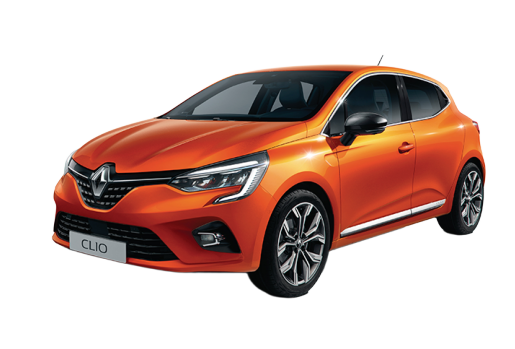

  0%|          | 0/10 [00:00<?, ?it/s]

BİLGİ ALMA
BİLGİ ALMA 1
BİLGİ ALMA 2


In [ ]:
app = Flask(__name__)
ngrok.set_auth_token("buraya kendi token ngrok kodunu yaz")
public_url =  ngrok.connect(port_no).public_url

ref.update({"site": str(public_url)+"/komut?baslat=ok"})

@app.route("/")
def home():
    return f"Running Flask on Google Colab!"

@app.route('/islem', methods=['GET'])
def islem():
    base64_data = request.args.get('base64')  # POST isteğiyle gönderilen veriyi al
    print(base64_data)
    return "gelen veri: {}".format(base64_data)
    # ... diğer işlemler

@app.route('/komut')
def komut():
    deger = request.args.get('baslat')
    print(deger)
    if(deger!=None):


        ref.listen(on_value)  # Remove indentation here
        time.sleep(10)

        #base64 olarak kayıt edilen veriyi çalıştır
        YOLO_islem(Veri.orijinal_goruntu)
        arka_plan_ayirma()
        goruntu_iyilestirme()
        goruntu_bilgisi_alma()
        print(Veri.orijinal_goruntu)
        print(Veri.yolo_goruntu)
        print(Veri.yolo_goruntu_bilgi)
        print(Veri.arka_plan_ayrilmis)
        print(Veri.iyilesitirilmis_goruntu)
        print(Veri.goruntu_bilgisi)
        print(Veri.firebase_veri_document_sayisi)
        print(Veri.urunKategori)
        firebase_veri_yukle()
        ref.update({"site": str(public_url)+"/komut?baslat=ok"})


        return 'gorsel işleniyor... {}'.format(deger)
    else:
        return 'merhaba... {}'.format(deger)

print(f"To acces the Gloable link please click {public_url}")

app.run(port=port_no)

In [18]:
print(Veri.orijinal_goruntu)
print(Veri.yolo_goruntu)
print(Veri.yolo_goruntu_bilgi)
print(Veri.arka_plan_ayrilmis)
print(Veri.iyilesitirilmis_goruntu)
print(Veri.goruntu_bilgisi)
print(Veri.firebase_veri_document_sayisi)
print(Veri.urunKategori)

Noneoutput.png
10Noneoutput.png
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([13., 13.], device='cuda:0')
conf: tensor([0.4807, 0.3034], device='cuda:0')
data: tensor([[8.3651e+01, 2.5833e+02, 5.0620e+02, 6.2221e+02, 4.8071e-01, 1.3000e+01],
        [1.8789e+02, 2.5851e+02, 4.9529e+02, 4.1186e+02, 3.0341e-01, 1.3000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (788, 557)
shape: torch.Size([2, 6])
xywh: tensor([[294.9258, 440.2688, 422.5492, 363.8831],
        [341.5883, 335.1825, 307.3998, 153.3486]], device='cuda:0')
xywhn: tensor([[0.5295, 0.5587, 0.7586, 0.4618],
        [0.6133, 0.4254, 0.5519, 0.1946]], device='cuda:0')
xyxy: tensor([[ 83.6512, 258.3272, 506.2004, 622.2104],
        [187.8884, 258.5082, 495.2882, 411.8568]], device='cuda:0')
xyxyn: tensor([[0.1502, 0.3278, 0.9088, 0.7896],
        [0.3373, 0.3281, 0.8892, 0.5227]], device='cuda:0')
Noneoutput.png10.png
Noneoutput.png10.png10.png
['Kısaca açıkla\nGörselde, doğal bir malzemed